In [1]:
# Langkah 1: Mengimpor Pustaka yang Diperlukan
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
# Langkah 2: Membaca Data dari CSV
# Membaca file Excel
data = pd.read_excel('dataset.xlsx')

# Menampilkan 5 baris pertama dari data
print(data.head())

   No Nama Kepala Keluarga    Nama Anak       Plan    Re-Plan
0   1                 Agus        Farel 2019-01-27 2019-01-28
1   2        Andri Rama KK        Laila 2019-01-27 2019-01-28
2   3                 Agus        Boyah 2019-01-27 2019-01-28
3   4       Taufik Hidayat  Bagus Biyyu 2019-01-27 2019-01-28
4   5       Dadi Hasanudin    Frans Edi 2019-01-27 2019-01-28


In [6]:
# Langkah 3: Inisialisasi Populasi
def initialize_population(pop_size, gene_length):
    return np.random.randint(0, [31, 11, 11, 11, 11], (pop_size, gene_length))

In [7]:
# Langkah 4: Menentukan Fungsi Fitness
def fitness(individual):
    # Fungsi fitness dapat didefinisikan berdasarkan aturan spesifik
    # Contoh sederhana: total nilai dari semua gen
    return np.sum(individual)

In [8]:
# Langkah 5: Seleksi Induk
def select_parents(population, fitnesses, num_parents):
    parents = np.empty((num_parents, population.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitnesses == np.max(fitnesses))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = population[max_fitness_idx, :]
        fitnesses[max_fitness_idx] = -99999999
    return parents

In [10]:
# Langkah 6: Crossover
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [11]:
# Langkah 7: Mutasi
def mutation(offspring, mutation_rate=0.01):
    for idx in range(offspring.shape[0]):
        for _ in range(int(offspring.shape[1] * mutation_rate)):
            gene_idx = random.randint(0, offspring.shape[1] - 1)
            if gene_idx == 0:
                offspring[idx, gene_idx] = random.randint(0, 30)
            else:
                offspring[idx, gene_idx] = random.randint(0, 10)
    return offspring

In [12]:
# Langkah 8: Menjalankan Algoritma Genetika
pop_size = 13  # Ukuran populasi
gene_length = 5  # Panjang gen individu
num_generations = 50  # Jumlah generasi
num_parents_mating = 4  # Jumlah induk yang dipilih

population = initialize_population(pop_size, gene_length)

# Menyimpan nilai fitness terbaik setiap generasi
best_fitness_values = []

for generation in range(num_generations):
    fitnesses = np.array([fitness(individual) for individual in population])
    parents = select_parents(population, fitnesses, num_parents_mating)
    offspring_crossover = crossover(parents, (pop_size - parents.shape[0], gene_length))
    offspring_mutation = mutation(offspring_crossover)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation
    
    # Simpan nilai fitness terbaik
    best_fitness_values.append(np.max(fitnesses))
    
    # Print hasil generasi ini
    print(f"Generation {generation}: Best fitness = {np.max(fitnesses)}")

Generation 0: Best fitness = 37
Generation 1: Best fitness = 49
Generation 2: Best fitness = 51
Generation 3: Best fitness = 54
Generation 4: Best fitness = 54
Generation 5: Best fitness = 54
Generation 6: Best fitness = 54
Generation 7: Best fitness = 54
Generation 8: Best fitness = 54
Generation 9: Best fitness = 54
Generation 10: Best fitness = 54
Generation 11: Best fitness = 54
Generation 12: Best fitness = 54
Generation 13: Best fitness = 54
Generation 14: Best fitness = 54
Generation 15: Best fitness = 54
Generation 16: Best fitness = 54
Generation 17: Best fitness = 54
Generation 18: Best fitness = 54
Generation 19: Best fitness = 54
Generation 20: Best fitness = 54
Generation 21: Best fitness = 54
Generation 22: Best fitness = 54
Generation 23: Best fitness = 54
Generation 24: Best fitness = 54
Generation 25: Best fitness = 54
Generation 26: Best fitness = 54
Generation 27: Best fitness = 54
Generation 28: Best fitness = 54
Generation 29: Best fitness = 54
Generation 30: Best 

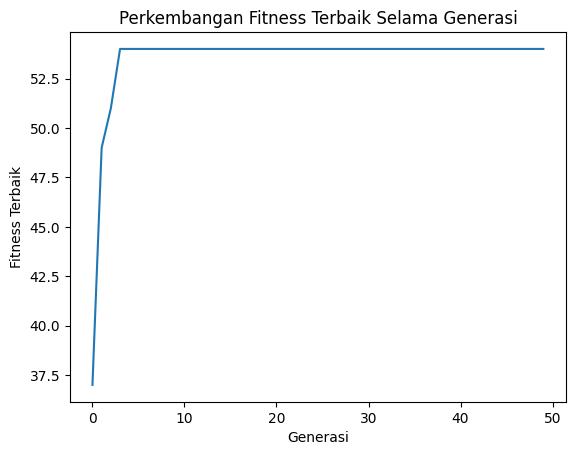

Best individual: [26 10  4  8  6]
Best fitness: 54


In [13]:
# Langkah 9: Visualisasi Hasil
plt.plot(range(num_generations), best_fitness_values)
plt.xlabel('Generasi')
plt.ylabel('Fitness Terbaik')
plt.title('Perkembangan Fitness Terbaik Selama Generasi')
plt.show()

# Menampilkan individu terbaik
best_individual_idx = np.argmax([fitness(individual) for individual in population])
best_individual = population[best_individual_idx]
print("Best individual:", best_individual)
print("Best fitness:", fitness(best_individual))